<a href="https://colab.research.google.com/github/Ankitkumar1015/Gender-recognition/blob/main/gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [3]:
data_dir = '/content/drive/MyDrive/Ml/gender. google - Copy'

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 832 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 178s 6s/step - accuracy: 0.7884 - loss: 0.7662 - val_accuracy: 0.8802 - val_loss: 0.4482
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


26/26 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 1.0836
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8564 - loss: 0.4354 - val_accuracy: 0.8542 - val_loss: 0.4419
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2374
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8695 - loss: 0.4197 - val_accuracy: 0.8594 - val_loss: 0.4355
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.2610
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8827 - loss: 0.3516 - val_accuracy: 0.8646 - val_loss: 0.4369
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3692
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8577 - loss: 0.4132 - val_accurac

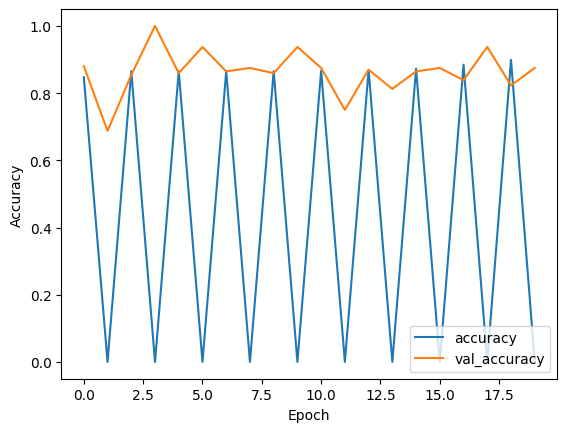

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


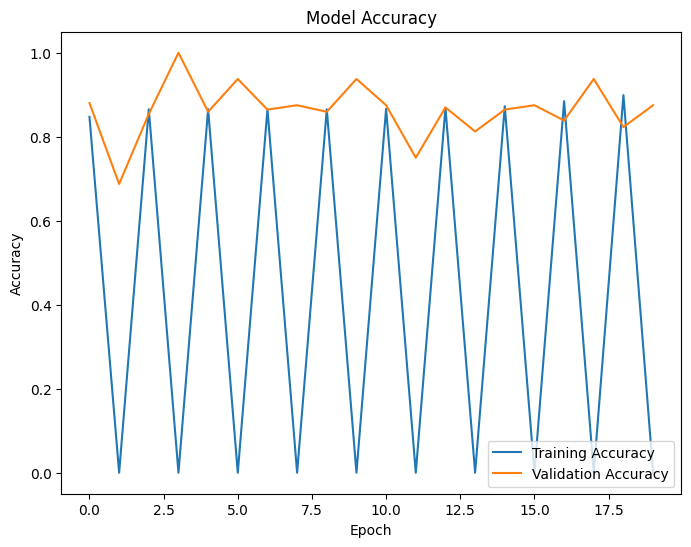

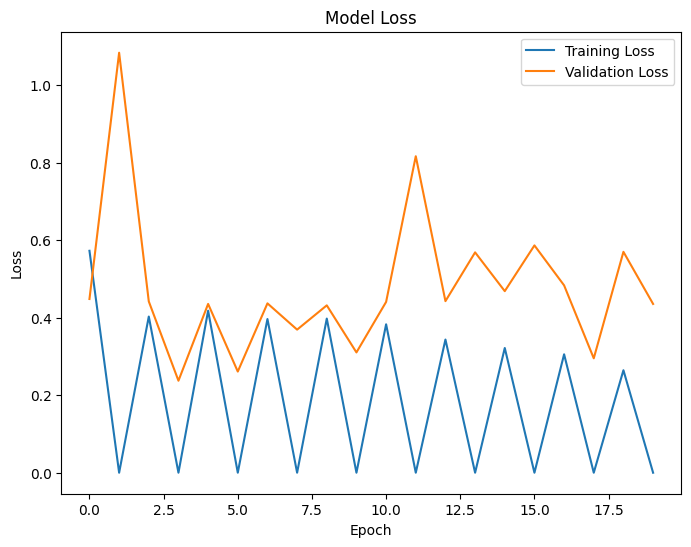

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 390ms/step - accuracy: 0.8485 - loss: 0.4665
Validation Loss: 0.5595457553863525
Validation Accuracy: 0.8269230723381042


In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


In [8]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)

# Print the accuracy in percentage
accuracy_percentage = accuracy * 100
print(f'Validation Accuracy: {accuracy_percentage:.2f}%')


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - accuracy: 0.8160 - loss: 0.6567
Validation Accuracy: 82.69%


In [9]:
model.save('gender_classification_model.h5')


In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30  # You can adjust the number of epochs as needed
)


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9138 - loss: 0.2187 - val_accuracy: 0.8281 - val_loss: 0.6136
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.3761
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9221 - loss: 0.2014 - val_accuracy: 0.8125 - val_loss: 0.7035
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4361
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9401 - loss: 0.1448 - val_accuracy: 0.8385 - val_loss: 0.6476
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 1.3301
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9541 - loss: 0.1328 - val_accuracy: 0.8177 - val_loss: 0.8554
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9939 - loss: 0.0153 - val_accuracy: 0.8333 - val_loss: 1.8776
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 3.8721
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9898 - loss: 0.0202 - val_accuracy: 0.7917 - val_loss: 2.4842
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 2.8537
Epoch 5/20
11/26 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9868 - loss: 0.0275

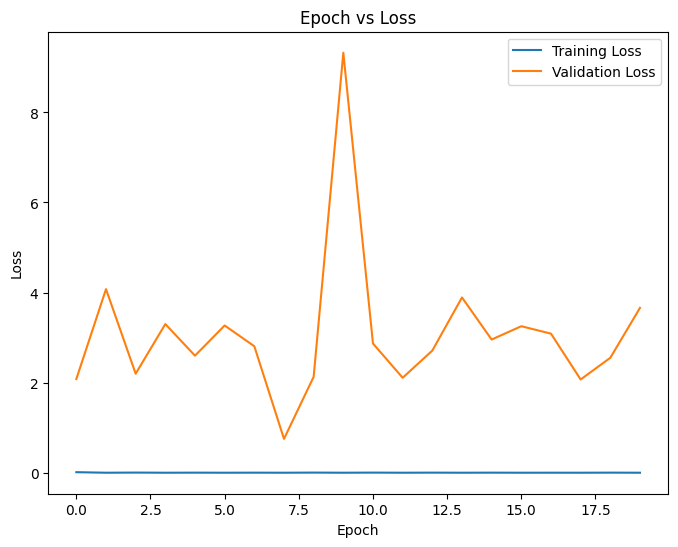

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Get the true labels and the predicted labels
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 703ms/step


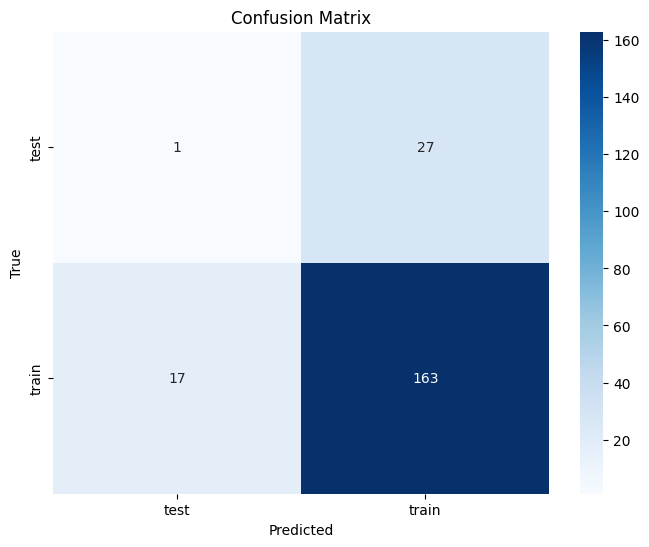

              precision    recall  f1-score   support

        test       0.06      0.04      0.04        28
       train       0.86      0.91      0.88       180

    accuracy                           0.79       208
   macro avg       0.46      0.47      0.46       208
weighted avg       0.75      0.79      0.77       208



In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optionally, you can also print a classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [ ]:
precision = precision_score(true_classes, predicted_classes, average='binary')
print(f'Precision: {precision:.2f}')

Precision: 0.86


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc

In [ ]:
fpr, tpr, _ = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

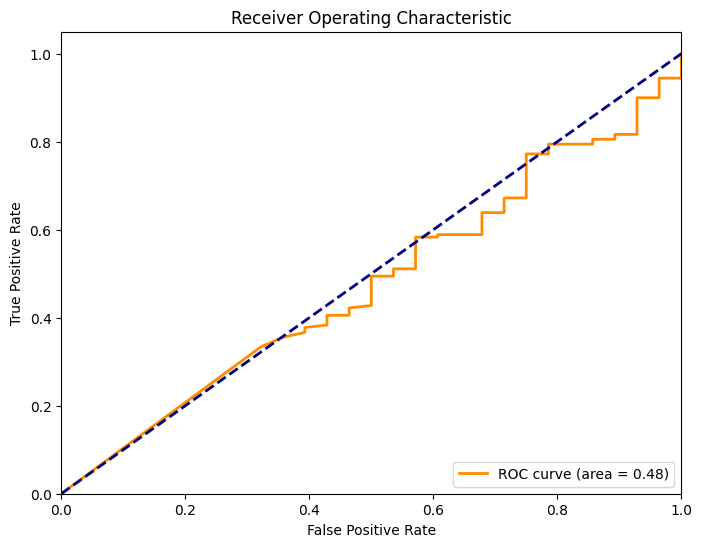

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()